**HARSH PODDAR 2021B3A71086G**

***PRIVATE SCORE: 575.78641***

***PUBLIC SCORE: 565.47270***

In [142]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
#loading data

train_data = pd.read_csv(r"Data\train.csv")
test_data = pd.read_csv(r"Data\test.csv")


In [144]:
train_data = train_data.drop('Unnamed: 0',axis=1)

**EXPLORATORY DATA ANALYSIS**

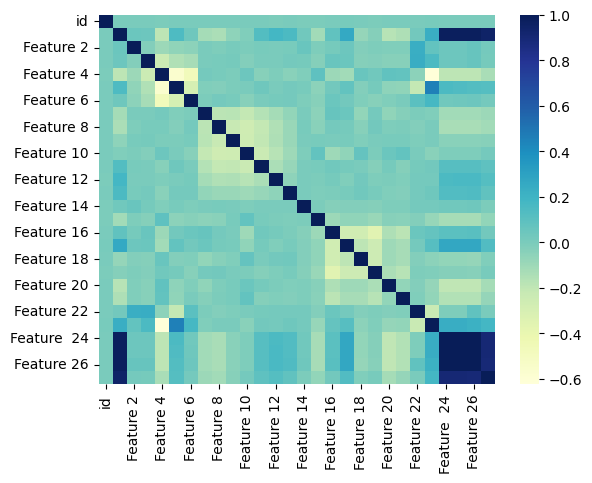

In [145]:
dataplot = sns.heatmap(train_data.corr(), cmap="YlGnBu")

In [146]:
# Drop columns that are not relevant for analysis
train_corr = train_data.corr().drop([f'Feature {x}' for x in range(2,23)]).drop('id').drop('id',axis=1)

# Take the absolute value of all values in the correlation matrix
train_corr = train_corr.apply(lambda x : abs(x))

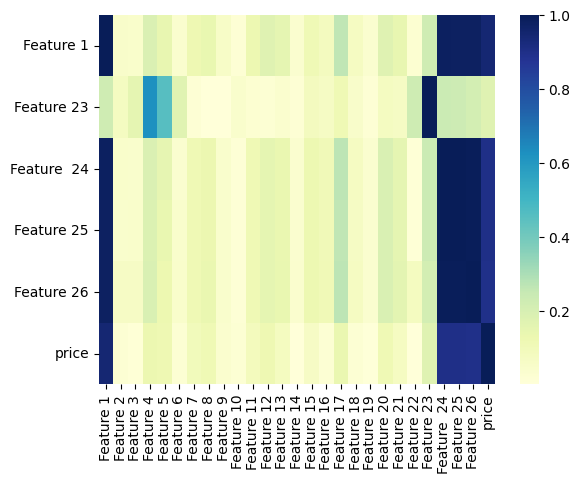

In [147]:
dataplot = sns.heatmap(train_corr, cmap="YlGnBu")


In [148]:

train_data['price2'] = train_data['price'] / train_data['Feature 1']
train_data['price3'] = train_data['price'] / train_data['Feature 1'].apply(lambda x : x*x)


#In this corr matrix we see that Feature 1 has high corr with price so we divided price with Feature 1 to calculate unit prices.
# This process makes the analysis even better as while doing so there wont be any bias from Feature 1



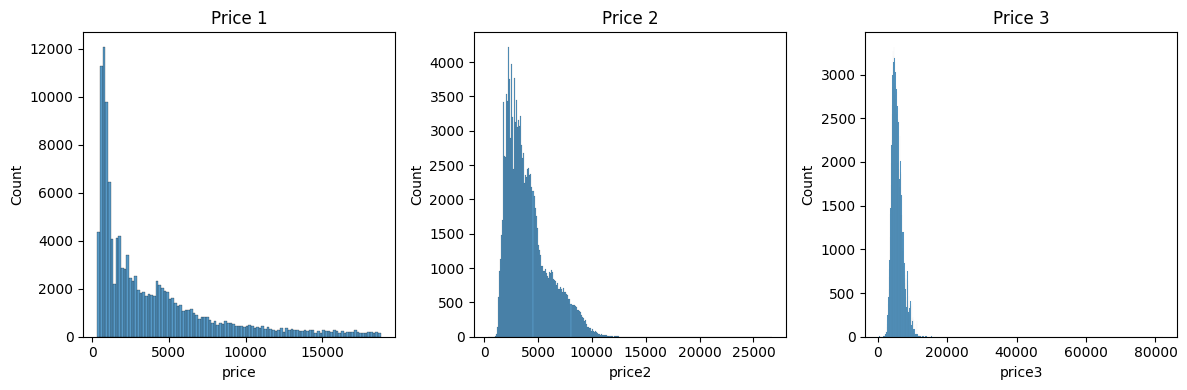

In [149]:
# create a figure with three subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4))

# plot data on first subplot
sns.histplot(x='price', data=train_data, ax=axes[0])
axes[0].set_title('Price 1')

# plot data on second subplot
sns.histplot(x='price2', data=train_data, ax=axes[1])
axes[1].set_title('Price 2')

# plot data on third subplot
sns.histplot(x='price3',data=train_data, ax=axes[2])
axes[2].set_title('Price 3')

# adjust spacing between subplots
plt.tight_layout()

# show the plot
plt.show()


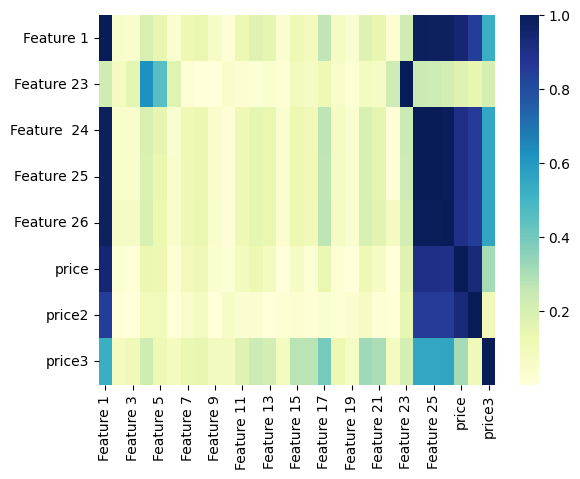

In [150]:
train_corr = train_data.corr().drop([f'Feature {x}' for x in range(2,23)]).drop('id').drop('id',axis=1)

train_corr = train_corr.apply(lambda x : abs(x))

dataplot = sns.heatmap(train_corr, cmap="YlGnBu")

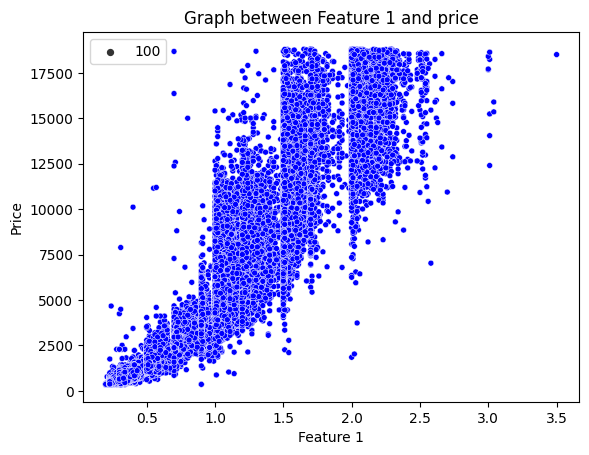

In [151]:
sns.scatterplot(x='Feature 1', y='price', data=train_data, color='blue', size=100)
plt.title('Graph between Feature 1 and price')
plt.xlabel('Feature 1')
plt.ylabel('Price')
plt.show()

#Feature 1 shows a postive corr with price

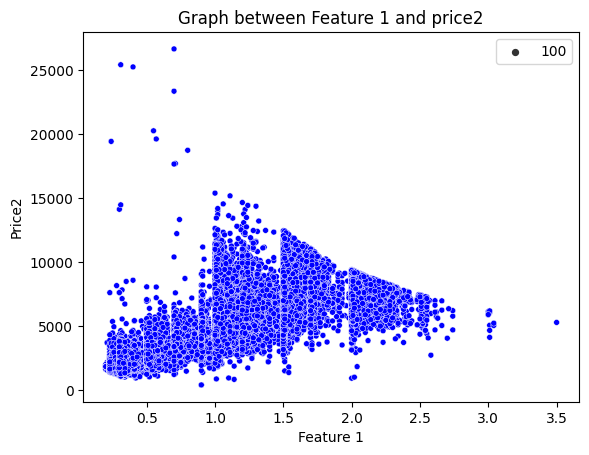

In [152]:
sns.scatterplot(x='Feature 1', y='price2', data=train_data, color='blue', size=100)
plt.title('Graph between Feature 1 and price2')
plt.xlabel('Feature 1')
plt.ylabel('Price2')
plt.show()

#By divding this diluted the effect of Feature1

In [ ]:
#train_data['Feature 26.1'] = train_data["Feature 26"]/train_data['Feature 1']
#train_data['Feature 24.1'] = train_data["Feature  24"]/train_data['Feature 1']
#train_data['Feature 25.1'] = train_data["Feature 25"]/train_data['Feature 1']


#test_data['Feature 26.1'] = test_data["Feature 26"]/test_data['Feature 1']
#test_data['Feature 24.1'] = test_data["Feature  24"]/test_data['Feature 1']
#test_data['Feature 25.1'] = test_data["Feature 25"]/test_data['Feature 1']



The Graphs below shows the relation between Feature 1 and Feature 25 & 26 respectively.                                                                                                                       

They show a postive relation with Feature1. Hence if we create a new Variable Feature26.1 it may increase the accuracy of the whole model

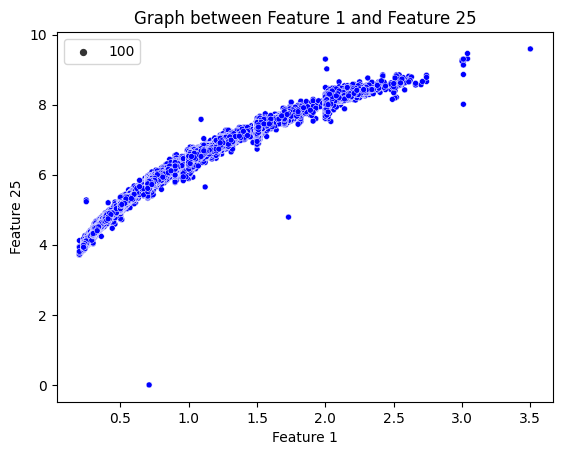

In [153]:
sns.scatterplot(x='Feature 1', y='Feature 25', data=train_data, color='blue', size=100)
plt.title('Graph between Feature 1 and Feature 25')
plt.xlabel('Feature 1')
plt.ylabel('Feature 25')
plt.show()

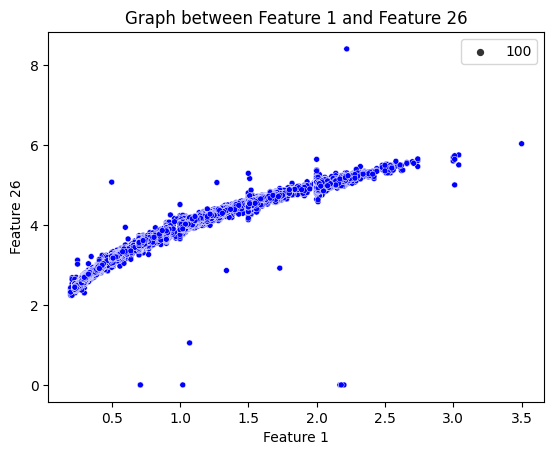

In [154]:
sns.scatterplot(x='Feature 1', y='Feature 26', data=train_data, color='blue', size=100)
plt.title('Graph between Feature 1 and Feature 26')
plt.xlabel('Feature 1')
plt.ylabel('Feature 26')
plt.show()


**DATA PRE-PROCESSING**

Price 3 is Highly skewed towards Right hence we need to remove OUTLIERS to clean the data

Text(0.5, 1.0, 'Price 3')

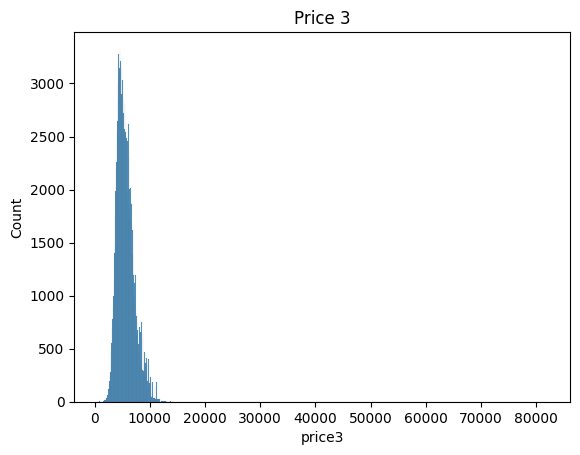

In [155]:
sns.histplot(x='price3',data=train_data)
plt.title('Price 3')

In [156]:
train_data.loc[(train_data['price3'] > 12500) | (train_data['price3'] < 1700) ].shape

(141, 30)

In [157]:
train_data2 = train_data.loc[(train_data['price3'] < 12500) & (train_data['price3'] > 1700)]

<Axes: xlabel='price3', ylabel='Count'>

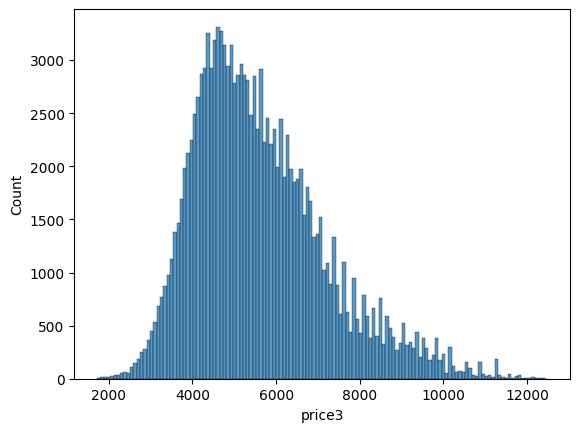

In [158]:
#after removing outlier the graphs smoothens
sns.histplot(x="price3",data=train_data2)

In [159]:
train_data = pd.read_csv(r"Data\train_data2.csv")
test_data = pd.read_csv(r"Data\test.csv")
test_temp = test_data['Feature 1']

In [160]:
train_data


,Unnamed: 0.1,Unnamed: 0,id,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,...,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,price,price2,price3
0,0,143728,143728,0.53,0,0,1,0,0,0,...,0,0,62.0,56.0,5.16,5.20,3.21,1656,3124.528302,5895.336419
1,1,52657,52657,0.50,0,1,0,0,0,0,...,0,0,63.8,56.0,4.89,5.02,3.18,1063,2126.000000,4252.000000
2,2,124407,124407,2.03,0,0,1,0,0,0,...,0,0,59.2,60.0,8.39,8.29,4.94,18508,9117.241379,4491.251911
3,3,45535,45535,0.33,0,0,1,0,0,0,...,0,0,61.5,55.0,4.41,4.47,2.73,723,2190.909091,6639.118457
4,4,178894,178894,0.90,0,1,0,0,0,0,...,0,0,63.6,59.0,6.04,6.08,3.86,3187,3541.111111,3934.567901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135354,135496,34345,34345,0.70,0,1,0,0,0,1,...,0,0,63.3,57.0,5.65,5.61,3.56,2380,3400.000000,4857.142857
135355,135497,9899,9899,0.33,0,0,1,0,0,0,...,0,0,62.6,57.0,4.43,4.40,2.77,693,2100.000000,6363.636364
135356,135498,142454,142454,2.03,0,0,0,1,0,0,...,0,0,59.7,59.0,8.38,8.30,4.97,16068,7915.270936,3899.148244
135357,135499,129168,129168,0.73,0,1,0,0,0,0,...,0,0,63.2,59.0,5.67,5.72,3.61,2964,4060.273973,5562.019141


In [161]:
col = list(train_data.columns)
col.remove('Unnamed: 0')
col.remove('Unnamed: 0.1')
col.remove('id')
col.remove('price')
col.remove('price3')
col.remove('price2')
col

['Feature 1',
 'Feature 2',
 'Feature 3',
 'Feature 4',
 'Feature 5',
 'Feature 6',
 'Feature 7',
 'Feature 8',
 'Feature 9',
 'Feature 10',
 'Feature 11',
 'Feature 12',
 'Feature 13',
 'Feature 14',
 'Feature 15',
 'Feature 16',
 'Feature 17',
 'Feature 18',
 'Feature 19',
 'Feature 20',
 'Feature 21',
 'Feature 22',
 'Feature 23',
 'Feature  24',
 'Feature 25',
 'Feature 26']

In [162]:
train_data['train-test'] = "train"
test_data['train-test'] = "test"

In [163]:
#we have combined the test and train data so that it is evenly normalized

combined_df = pd.concat([train_data,test_data]).fillna('TBC')


In [164]:
scaler = MinMaxScaler()

combined_df["Feature 1"] = scaler.fit_transform(np.array(combined_df["Feature 1"]).reshape(-1,1))
combined_df["Feature 22"] = scaler.fit_transform(np.array(combined_df["Feature 22"]).reshape(-1,1))
combined_df["Feature 23"] = scaler.fit_transform(np.array(combined_df["Feature 23"]).reshape(-1,1))
combined_df["Feature  24"] = scaler.fit_transform(np.array(combined_df["Feature  24"]).reshape(-1,1))
combined_df["Feature 25"] = scaler.fit_transform(np.array(combined_df["Feature 25"]).reshape(-1,1))
combined_df["Feature 26"] = scaler.fit_transform(np.array(combined_df["Feature 26"]).reshape(-1,1))

In [165]:
df_group = combined_df.groupby(['train-test'])
train_data = df_group.get_group('train')
test_data = df_group.get_group('test')

In [166]:
train_data = train_data.drop('train-test',axis=1)
test_data = test_data.drop('train-test',axis=1)

In [167]:
test_data = test_data.drop('price',axis = 1)

In [168]:
from xgboost import XGBRegressor

In [169]:
xg = XGBRegressor(n_estimators=300, learning_rate=0.05,subsample = 0.75)


In [170]:
train_data_input = train_data[col]
train_data_target = train_data['price2']

# Using price2 as the target variable as its corr with Feature1 is the minimum and using it increase the accuracy of the model

In [171]:
train_data_input


,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 17,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26
0,0.103125,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0.507692,0.233333,0.542587,0.519481,0.102556
1,0.093750,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0.600000,0.233333,0.514196,0.501499,0.101597
2,0.571875,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0.364103,0.366667,0.882229,0.828172,0.157827
3,0.040625,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0.482051,0.200000,0.463722,0.446553,0.087220
4,0.218750,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0.589744,0.333333,0.635121,0.607393,0.123323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135354,0.156250,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0.574359,0.266667,0.594111,0.560440,0.113738
135355,0.040625,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0.538462,0.266667,0.465825,0.439560,0.088498
135356,0.571875,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.389744,0.333333,0.881178,0.829171,0.158786
135357,0.165625,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0.569231,0.333333,0.596215,0.571429,0.115335


In [172]:
test_data_input = test_data[col]


In [173]:
xg.fit(train_data_input,train_data_target)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [174]:
test_pred = xg.predict(test_data_input)

In [177]:
test_pred


array([3798.1707, 2367.3635, 4420.1313, ..., 4596.9546, 5907.453 ,
       3254.4192], dtype=float32)

In [178]:
#because initially I have divided feature 1 while training the model, I have to multiply it here

test_pred_f = test_pred * test_temp.apply(lambda x : x) 


In [179]:
price_pred = pd.DataFrame({'id': test_data.id, 'Price': test_pred_f})

In [ ]:
price_pred.to_csv('./Results/Result20_xg_norm2.csv',index=False)


**MODEL ENDS HERE, BELOW ARE ALTERNATE METHODS I USED FOR THIS MODEL**

**ALTERNATE METHODS FOR NORMALIZATION**


****1. BINNING****


Generally Binning increases the accuracy of the model but as the price 3 was measured as unit price xg boost was giving errors while predicting the model.

<Axes: xlabel='price3', ylabel='Count'>

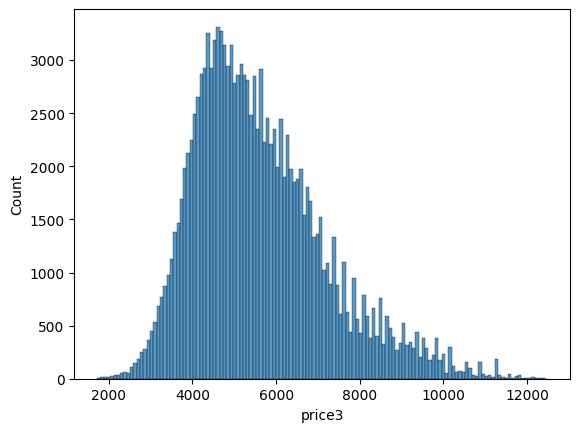

In [192]:
sns.histplot(train_data, x="price3")

In [193]:
train_data.loc[(train_data['price3'] < 4750),'bin'] = 1
train_data.loc[(train_data['price3'] >= 4750) & (train_data['price3'] < 6250),'bin'] = 2
train_data.loc[(train_data['price3'] >= 6250 ) ,'bin'] = 3


In [196]:
train_data

,id,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,price,price2,price3,bin
0,143728,0.103125,0,0,1,0,0,0,1,0,...,0,0.507692,0.233333,0.542587,0.519481,0.102556,1656.0,3124.528302,5895.336419,2.0
1,52657,0.093750,0,1,0,0,0,0,0,0,...,0,0.600000,0.233333,0.514196,0.501499,0.101597,1063.0,2126.0,4252.0,1.0
2,124407,0.571875,0,0,1,0,0,0,0,0,...,0,0.364103,0.366667,0.882229,0.828172,0.157827,18508.0,9117.241379,4491.251911,1.0
3,45535,0.040625,0,0,1,0,0,0,1,0,...,0,0.482051,0.200000,0.463722,0.446553,0.087220,723.0,2190.909091,6639.118457,3.0
4,178894,0.218750,0,1,0,0,0,0,0,0,...,0,0.589744,0.333333,0.635121,0.607393,0.123323,3187.0,3541.111111,3934.567901,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135354,34345,0.156250,0,1,0,0,0,1,0,0,...,0,0.574359,0.266667,0.594111,0.560440,0.113738,2380.0,3400.0,4857.142857,2.0
135355,9899,0.040625,0,0,1,0,0,0,0,0,...,0,0.538462,0.266667,0.465825,0.439560,0.088498,693.0,2100.0,6363.636364,3.0
135356,142454,0.571875,0,0,0,1,0,0,0,0,...,0,0.389744,0.333333,0.881178,0.829171,0.158786,16068.0,7915.270936,3899.148244,1.0
135357,129168,0.165625,0,1,0,0,0,0,1,0,...,0,0.569231,0.333333,0.596215,0.571429,0.115335,2964.0,4060.273973,5562.019141,2.0


The Bins are almost balanced so training the model with equal bins increases the accuracy

<Axes: xlabel='bin', ylabel='Count'>

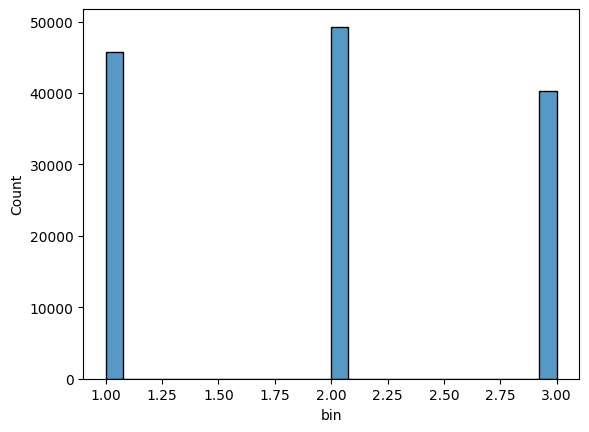

In [197]:
sns.histplot(train_data, x="bin")

In [198]:
col = list(train_data.columns)
col.remove('id')
col.remove('price')
col.remove('price2')
col.remove('price3')
col.remove('bin')
col

['Feature 1',
 'Feature 2',
 'Feature 3',
 'Feature 4',
 'Feature 5',
 'Feature 6',
 'Feature 7',
 'Feature 8',
 'Feature 9',
 'Feature 10',
 'Feature 11',
 'Feature 12',
 'Feature 13',
 'Feature 14',
 'Feature 15',
 'Feature 16',
 'Feature 17',
 'Feature 18',
 'Feature 19',
 'Feature 20',
 'Feature 21',
 'Feature 22',
 'Feature 23',
 'Feature  24',
 'Feature 25',
 'Feature 26']

In [199]:
target_variable = train_data['bin']
train_data_input = train_data[col]

In [200]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=10)

#using classifier to divided the input feature of the test_data into bins

In [201]:
classifier.fit(train_data_input,target_variable)


DecisionTreeClassifier(max_depth=10)

In [202]:
test_data_input = test_data[col]
test_data_input

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 17,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26
0,0.187500,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0.410256,0.333333,0.635121,0.598402,0.115335
1,0.112500,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0.512821,0.166667,0.558360,0.527473,0.104792
2,0.253125,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0.487179,0.433333,0.672976,0.634366,0.125240
3,0.031250,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0.553846,0.300000,0.447950,0.429570,0.085942
4,0.009375,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0.528205,0.300000,0.416404,0.397602,0.078914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58067,0.250000,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0.497436,0.233333,0.666667,0.647353,0.126518
58068,0.165625,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0.512821,0.266667,0.603575,0.576424,0.114377
58069,0.281250,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0.517949,0.300000,0.692955,0.653347,0.130351
58070,0.221875,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0.302564,0.366667,0.675079,0.634366,0.118530


In [205]:
test_data = test_data.drop('Unnamed: 0',axis=1)
test_data = test_data.drop('Unnamed: 0.1',axis=1)
test_data = test_data.drop('price2',axis=1)
test_data = test_data.drop('price3',axis=1)



In [206]:
y_pred = classifier.predict(test_data_input)


In [207]:
test_data['bin'] = y_pred


In [208]:
test_data


,id,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,bin
0,132523,0.187500,0,0,0,1,0,0,0,1,...,0,0,0,0,0.410256,0.333333,0.635121,0.598402,0.115335,2.0
1,70210,0.112500,0,0,1,0,0,0,1,0,...,0,0,0,0,0.512821,0.166667,0.558360,0.527473,0.104792,1.0
2,93051,0.253125,0,0,0,1,0,0,0,0,...,0,0,0,0,0.487179,0.433333,0.672976,0.634366,0.125240,1.0
3,67325,0.031250,0,0,0,0,1,0,0,0,...,0,0,1,0,0.553846,0.300000,0.447950,0.429570,0.085942,3.0
4,189522,0.009375,0,0,0,1,0,0,1,0,...,0,0,0,1,0.528205,0.300000,0.416404,0.397602,0.078914,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58067,51474,0.250000,0,0,1,0,0,1,0,0,...,0,0,0,0,0.497436,0.233333,0.666667,0.647353,0.126518,1.0
58068,50296,0.165625,0,0,1,0,0,0,1,0,...,0,0,0,0,0.512821,0.266667,0.603575,0.576424,0.114377,2.0
58069,95077,0.281250,0,0,0,1,0,0,0,0,...,0,0,0,0,0.517949,0.300000,0.692955,0.653347,0.130351,1.0
58070,71500,0.221875,0,0,0,1,0,0,1,0,...,1,0,0,0,0.302564,0.366667,0.675079,0.634366,0.118530,2.0


**1.1 IMPLEMENTATION OF BINNING**

In [300]:
train_data = pd.read_csv(r"Data\train_data_binned.csv")
test_data = pd.read_csv(r"Data\test_data_binned.csv")

In [301]:
col = list(train_data.columns)
col.remove('Unnamed: 0')
col.remove('Unnamed: 0.1')
col.remove('id')
col.remove('price')
col.remove('bin')

col

['Feature 1',
 'Feature 2',
 'Feature 3',
 'Feature 4',
 'Feature 5',
 'Feature 6',
 'Feature 7',
 'Feature 8',
 'Feature 9',
 'Feature 10',
 'Feature 11',
 'Feature 12',
 'Feature 13',
 'Feature 14',
 'Feature 15',
 'Feature 16',
 'Feature 17',
 'Feature 18',
 'Feature 19',
 'Feature 20',
 'Feature 21',
 'Feature 22',
 'Feature 23',
 'Feature  24',
 'Feature 25',
 'Feature 26']

In [302]:
train_data['train-test'] = "train"
test_data['train-test'] = "test"

In [303]:
combined_df = pd.concat([train_data,test_data]).fillna('TBC')

In [304]:
scaler = MinMaxScaler()

#combined_df["Feature 1"] = scaler.fit_transform(np.array(combined_df["Feature 1"]).reshape(-1,1))
combined_df["Feature 22"] = scaler.fit_transform(np.array(combined_df["Feature 22"]).reshape(-1,1))
combined_df["Feature 23"] = scaler.fit_transform(np.array(combined_df["Feature 23"]).reshape(-1,1))
combined_df["Feature  24"] = scaler.fit_transform(np.array(combined_df["Feature  24"]).reshape(-1,1))
combined_df["Feature 25"] = scaler.fit_transform(np.array(combined_df["Feature 25"]).reshape(-1,1))
combined_df["Feature 26"] = scaler.fit_transform(np.array(combined_df["Feature 26"]).reshape(-1,1))

In [305]:
df_group = combined_df.groupby(['train-test'])
train_data = df_group.get_group('train')
test_data = df_group.get_group('test')

In [306]:
train_data = train_data.drop('train-test',axis=1)
test_data = test_data.drop('train-test',axis=1)

In [307]:
from xgboost import XGBRegressor

xg1 = XGBRegressor(n_estimators=300, learning_rate=0.05,subsample = 0.5)
xg2 = XGBRegressor(n_estimators=300, learning_rate=0.05,subsample = 0.5)
xg3 = XGBRegressor(n_estimators=300, learning_rate=0.05,subsample = 0.5)

#these parameters can be changed according to the data

In [308]:
train_data_bin_1 = train_data.loc[train_data['bin'] == 1]
train_data_bin_1_input = train_data_bin_1[col]
train_data_bin_1_target = train_data_bin_1['price']

train_data_bin_2 = train_data.loc[train_data['bin'] == 2]
train_data_bin_2_input = train_data_bin_2[col]
train_data_bin_2_target = train_data_bin_2['price']

train_data_bin_3 = train_data.loc[train_data['bin'] == 3]
train_data_bin_3_input = train_data_bin_3[col]
train_data_bin_3_target = train_data_bin_3['price']

In [309]:
test_data_bin_1 = test_data.loc[test_data['bin'] == 1]
test_data_bin_1_input = test_data_bin_1[col]

test_data_bin_2 = test_data.loc[test_data['bin'] == 2]
test_data_bin_2_input = test_data_bin_2[col]

test_data_bin_3 = test_data.loc[test_data['bin'] == 3]
test_data_bin_3_input = test_data_bin_3[col]

In [310]:
xg1.fit(train_data_bin_1_input,train_data_bin_1_target)
xg2.fit(train_data_bin_2_input,train_data_bin_2_target)
xg3.fit(train_data_bin_3_input,train_data_bin_3_target)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [311]:
test_pred_bin_1 = xg.predict(test_data_bin_1_input)
test_pred_bin_2 = xg.predict(test_data_bin_2_input)
test_pred_bin_3 = xg.predict(test_data_bin_3_input)

In [312]:
price_pred_bin_1 = pd.DataFrame({'id': test_data_bin_1.id, 'Price': test_pred_bin_1})
price_pred_bin_2 = pd.DataFrame({'id': test_data_bin_2.id, 'Price': test_pred_bin_2})
price_pred_bin_3 = pd.DataFrame({'id': test_data_bin_3.id, 'Price': test_pred_bin_3})


In [ ]:
temp = pd.concat([price_pred_bin_1,price_pred_bin_2])
final = pd.concat([temp,price_pred_bin_3])
final.to_csv('./Results/Result17_bin.csv')

****2. K MEANS CLUSTERING****

K Means is also a very good way do divide your data into cluster so that you can indivially analyse the data into part

In [209]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [215]:
# Load data
data = pd.read_csv('./Data/train_data2.csv')

# Preprocess data
X = data[['price3']].values.astype(float)



c:\Users\harsh\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\harsh\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\harsh\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\harsh\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\harsh\anaconda3

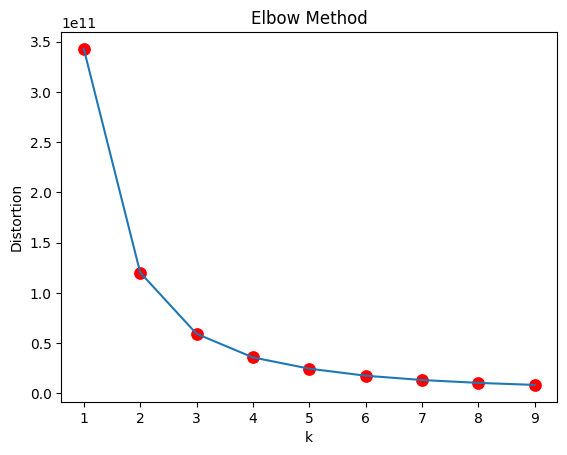

In [217]:
# Determine optimal number of clusters using elbow method
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    distortions.append(kmeanModel.inertia_)

# Plot elbow method with Seaborn
sns.lineplot(x=K, y=distortions)
sns.scatterplot(x=K, y=distortions, s=100, color='red')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

In [218]:
# Fit K-means algorithm
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

# Predict clusters
labels = kmeans.predict(X)

# Assign categories to clusters
category_labels = [1 ,2, 3, 4]
categories = [category_labels[label] for label in labels]

# Add categories to dataframe
data['category'] = categories

# View data
print(data.head())

c:\Users\harsh\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   Unnamed: 0.1  Unnamed: 0      id  Feature 1  Feature 2  Feature 3   
0             0      143728  143728       0.53          0          0  \
1             1       52657   52657       0.50          0          1   
2             2      124407  124407       2.03          0          0   
3             3       45535   45535       0.33          0          0   
4             4      178894  178894       0.90          0          1   

   Feature 4  Feature 5  Feature 6  Feature 7  ...  Feature 21  Feature 22   
0          1          0          0          0  ...           0        62.0  \
1          0          0          0          0  ...           0        63.8   
2          1          0          0          0  ...           0        59.2   
3          1          0          0          0  ...           0        61.5   
4          0          0          0          0  ...           0        63.6   

   Feature 23  Feature  24  Feature 25  Feature 26  price       price2   
0        56.0         5.

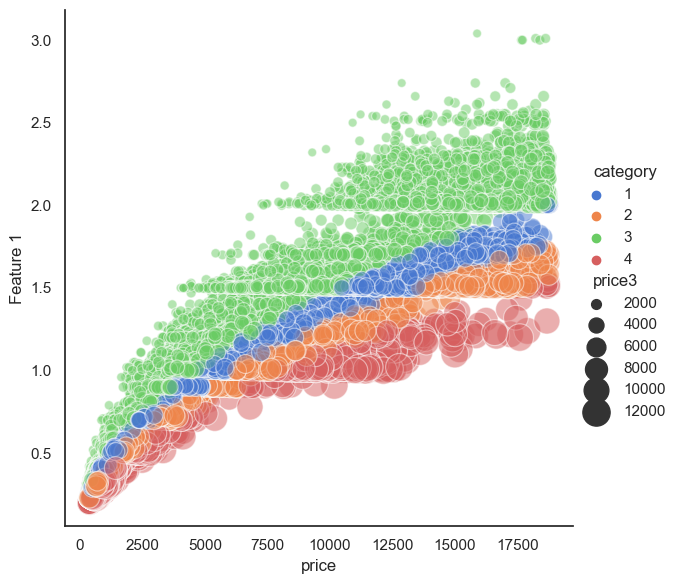

In [219]:
import seaborn as sns
sns.set_theme(style="white")

sns.relplot(x='price', y="Feature 1", hue="category", size="price3",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data)

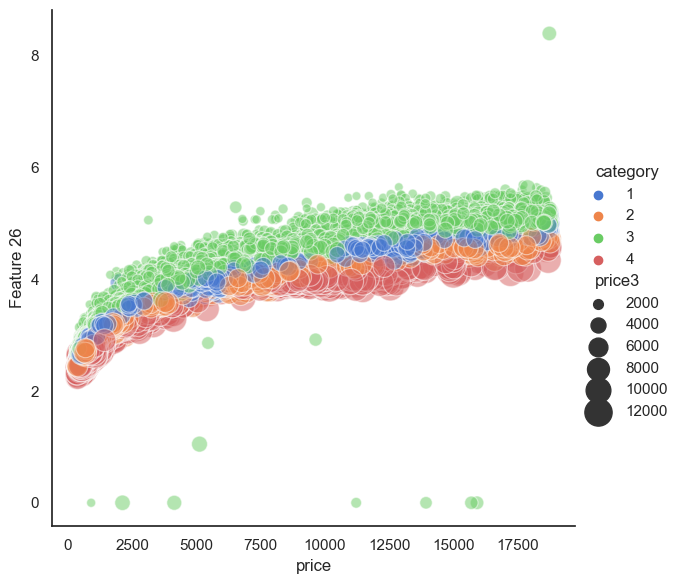

In [221]:

sns.relplot(x='price', y="Feature 26", hue="category", size="price3",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data)

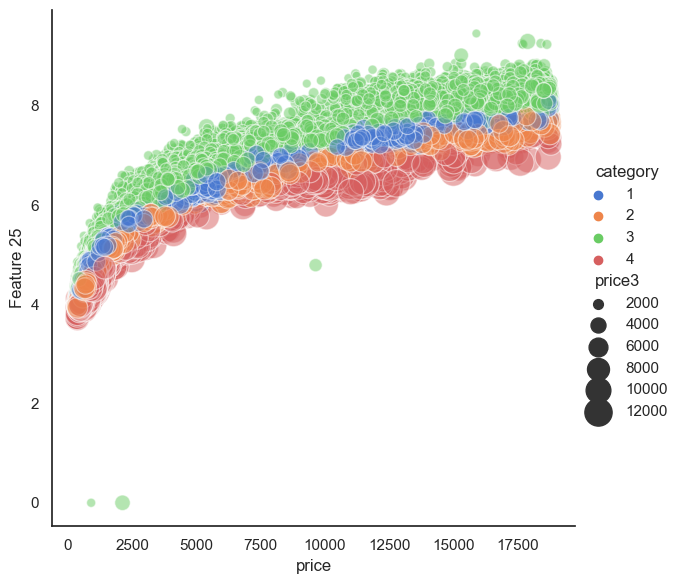

In [222]:

sns.relplot(x='price', y="Feature 25", hue="category", size="price3",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data)

**FEATURE SELECTION WITH BORUTA**

Feature Selection plays a very important role in increase the accuracy

In [228]:
data = pd.read_csv("./Data/train.csv")

In [229]:
train_input = data.drop('price',axis=1)
target_variable = data["price"]

In [ ]:
### initialize hits counter
hits = np.zeros((len(train_input.columns)))
### repeat 20 times
for iter_ in range(20):
   ### make X_shadow by randomly permuting each column of X
   np.random.seed(iter_)
   X_shadow = train_input.apply(np.random.permutation)
   X_boruta = pd.concat([train_input, X_shadow], axis = 1)
   ### fit a random forest (suggested max_depth between 3 and 7)
   rf = RandomForestRegressor(max_depth = 5, random_state = 42)
   rf.fit(X_boruta, target_variable)
   ### store feature importance
   feat_imp_X = rf.feature_importances_[:len(train_input.columns)]
   feat_imp_shadow = rf.feature_importances_[len(train_input.columns):]
   ### compute hits for this trial and add to counter
   hits += (feat_imp_X > feat_imp_shadow.max())

In [ ]:
col = train_input.columns
a = len(train_input.columns)
for i in range(2,a):
    if (hits[i] == 0):
        print(col[i])
        trian_input = train_input.drop(col[i],axis = 1)

#removing the features that have hit = 0 (meaning not useful for the dataset)

**3. MODELS USED FOR PREDICTION**

I used several model for prediction of price. XG boost worked the best. Other Model I used were RandomForestRegression and Building Neural Networks using Keras

****3.1 RandomForestRegression****

In [231]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [232]:
train_data = pd.read_csv(r"Data\train_data2.csv")
test_data = pd.read_csv(r"Data\test.csv")

In [233]:
col = list(train_data.columns)
col.remove('Unnamed: 0')
col.remove('Unnamed: 0.1')
col.remove('id')
col.remove('price')
col.remove('price3')
col.remove('price2')


In [234]:
rf = RandomForestRegressor(n_estimators = 50, max_features = 0.8, max_depth = 15, random_state = 18)

In [235]:
train_data_input = train_data[col]
train_data_target = train_data['price2']

In [236]:
test_data_input = test_data[col]
test_temp = test_data['Feature 1']

In [237]:
rf.fit(train_data_input,train_data_target)

RandomForestRegressor(max_depth=15, max_features=0.8, n_estimators=50,
                      random_state=18)

In [238]:
test_pred = rf.predict(test_data_input)


In [240]:
test_pred_f = test_pred * test_temp.apply(lambda x : x) 

In [241]:
price_pred = pd.DataFrame({'id': test_data.id, 'Price': test_pred_f})

In [ ]:
price_pred.to_csv('./Results/Result18_rf.csv')

**3.2 KERAS IMPLEMTATION (ANN)**

In [267]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# scaling and train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# creating a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
import keras

# evaluation on test data
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [268]:
train_data = pd.read_csv(r"Data\train_data2.csv")
test_data = pd.read_csv(r"Data\test.csv")

In [269]:
train_data

,Unnamed: 0.1,Unnamed: 0,id,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,...,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,price,price2,price3
0,0,143728,143728,0.53,0,0,1,0,0,0,...,0,0,62.0,56.0,5.16,5.20,3.21,1656,3124.528302,5895.336419
1,1,52657,52657,0.50,0,1,0,0,0,0,...,0,0,63.8,56.0,4.89,5.02,3.18,1063,2126.000000,4252.000000
2,2,124407,124407,2.03,0,0,1,0,0,0,...,0,0,59.2,60.0,8.39,8.29,4.94,18508,9117.241379,4491.251911
3,3,45535,45535,0.33,0,0,1,0,0,0,...,0,0,61.5,55.0,4.41,4.47,2.73,723,2190.909091,6639.118457
4,4,178894,178894,0.90,0,1,0,0,0,0,...,0,0,63.6,59.0,6.04,6.08,3.86,3187,3541.111111,3934.567901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135354,135496,34345,34345,0.70,0,1,0,0,0,1,...,0,0,63.3,57.0,5.65,5.61,3.56,2380,3400.000000,4857.142857
135355,135497,9899,9899,0.33,0,0,1,0,0,0,...,0,0,62.6,57.0,4.43,4.40,2.77,693,2100.000000,6363.636364
135356,135498,142454,142454,2.03,0,0,0,1,0,0,...,0,0,59.7,59.0,8.38,8.30,4.97,16068,7915.270936,3899.148244
135357,135499,129168,129168,0.73,0,1,0,0,0,0,...,0,0,63.2,59.0,5.67,5.72,3.61,2964,4060.273973,5562.019141


In [270]:
test_data

,Unnamed: 0,id,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 17,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26
0,132523,132523,0.80,0,0,0,1,0,0,0,...,0,0,0,0,0,60.1,59.0,6.04,5.99,3.61
1,70210,70210,0.56,0,0,1,0,0,0,1,...,1,0,0,0,0,62.1,54.0,5.31,5.28,3.28
2,93051,93051,1.01,0,0,0,1,0,0,0,...,0,0,0,0,0,61.6,62.0,6.40,6.35,3.92
3,67325,67325,0.30,0,0,0,0,1,0,0,...,0,0,0,1,0,62.9,58.0,4.26,4.30,2.69
4,189522,189522,0.23,0,0,0,1,0,0,1,...,0,0,0,0,1,62.4,58.0,3.96,3.98,2.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58067,51474,51474,1.00,0,0,1,0,0,1,0,...,1,0,0,0,0,61.8,56.0,6.34,6.48,3.96
58068,50296,50296,0.73,0,0,1,0,0,0,1,...,0,0,0,0,0,62.1,57.0,5.74,5.77,3.58
58069,95077,95077,1.10,0,0,0,1,0,0,0,...,0,0,0,0,0,62.2,58.0,6.59,6.54,4.08
58070,71500,71500,0.91,0,0,0,1,0,0,1,...,0,1,0,0,0,58.0,60.0,6.42,6.35,3.71


In [271]:
col = list(train_data.columns)
col.remove('Unnamed: 0')
col.remove('id')
col.remove('price')
col.remove('price2')
col.remove('price3')
col

['Unnamed: 0.1',
 'Feature 1',
 'Feature 2',
 'Feature 3',
 'Feature 4',
 'Feature 5',
 'Feature 6',
 'Feature 7',
 'Feature 8',
 'Feature 9',
 'Feature 10',
 'Feature 11',
 'Feature 12',
 'Feature 13',
 'Feature 14',
 'Feature 15',
 'Feature 16',
 'Feature 17',
 'Feature 18',
 'Feature 19',
 'Feature 20',
 'Feature 21',
 'Feature 22',
 'Feature 23',
 'Feature  24',
 'Feature 25',
 'Feature 26']

In [272]:
train_data['train-test'] = "train"
test_data['train-test'] = "test"

In [273]:
combined_df = pd.concat([train_data,test_data]).fillna('TBC')

In [274]:
scaler = MinMaxScaler()

#combined_df["Feature 1"] = scaler.fit_transform(np.array(combined_df["Feature 1"]).reshape(-1,1))
combined_df["Feature 22"] = scaler.fit_transform(np.array(combined_df["Feature 22"]).reshape(-1,1))
combined_df["Feature 23"] = scaler.fit_transform(np.array(combined_df["Feature 23"]).reshape(-1,1))
combined_df["Feature  24"] = scaler.fit_transform(np.array(combined_df["Feature  24"]).reshape(-1,1))
combined_df["Feature 25"] = scaler.fit_transform(np.array(combined_df["Feature 25"]).reshape(-1,1))
combined_df["Feature 26"] = scaler.fit_transform(np.array(combined_df["Feature 26"]).reshape(-1,1))


In [275]:
df_group = combined_df.groupby(['train-test'])
train_data = df_group.get_group('train')
test_data = df_group.get_group('test')

In [276]:
train_data = train_data.drop('train-test',axis=1)
test_data = test_data.drop('train-test',axis=1)

In [277]:
test_data = test_data.drop('price',axis = 1)

In [278]:
train_data_input = train_data[col]
train_data_target = train_data['price2']

train_data_target_min = train_data_target.min()
train_data_target_max = train_data_target.max()
train_data_target_norm = (train_data_target - train_data_target_min) / (train_data_target_max - train_data_target_min)

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_dim=train_data_input.shape[1]),
    keras.layers.Dense(128, activation='tanh'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(train_data_input.astype(float),train_data_target_norm.astype(float), batch_size=512, epochs=200)

# Evaluate the model
#mse = model.evaluate(X_test, y_test)
#print("Mean squared error:", mse)

In [ ]:
y_pred = model.predict(test_data_input.astype(float))

In [ ]:
y_pred2 = y_pred.reshape(y_pred.shape[0])

In [ ]:
y_pred_denorm = y_pred2 * (train_data_target_max - train_data_target_min) + (train_data_target_min)

In [ ]:
temp = test_data_input['Feature 1']
y_pred =  y_pred_denorm * temp.apply(lambda x : x) 

In [ ]:
price_pred = pd.DataFrame({'id': test_data.id, 'Price': y_pred})

In [ ]:
price_pred.to_csv('./Results/Result24_ann_.csv',index=False)

****USE OF ADDITIONAL DATA****

The additional data can be used to increase the training datapoints

In [281]:
train_data = pd.read_csv(r"Data\train.csv")
add_data = pd.read_csv(r"Data\additional_data.csv")

In [283]:
master = pd.concat([train_data,add_data])

In [284]:
#Some rows of Feature 22 has Nan Values so they had to be removed
master = master[~master['Feature 22'].isnull()]

In [ ]:
master.to_csv('./Data/master.csv',index=False)